Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import xgboost as xgb

### Reading Data

In [2]:
df=pd.read_csv("train 2.csv",parse_dates=['date'])
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [4]:
# Checking data types
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [5]:
#Cheking shape
df.shape

(913000, 4)

In [6]:
#checking dates range
df.date.max()

Timestamp('2017-12-31 00:00:00')

In [7]:
df.date.min()

Timestamp('2013-01-01 00:00:00')

In [8]:
df.date.max()-df.date.min()

Timedelta('1825 days 00:00:00')

In [9]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
df2=df.groupby(["item"]).agg({"sales": ["sum","mean","std","median"]})
df2.head(50)

sales                             
          sum       mean        std median
item                                      
1      401384  21.981599   8.468922   21.0
2     1069564  58.574151  20.093015   56.0
3      669087  36.642223  13.179441   35.0
4      401907  22.010241   8.403898   21.0
5      335230  18.358708   7.265167   18.0
6     1068281  58.503888  20.174898   56.0
7     1068777  58.531051  20.146002   56.0
8     1405108  76.950055  26.130697   74.0
9      938379  51.389869  17.790158   49.5
10    1337133  73.227437  24.823725   70.0
11    1271925  69.656353  23.744732   67.0
12    1271534  69.634940  23.738663   67.0
13    1539621  84.316594  28.311031   81.0
14    1071531  58.681873  20.079860   56.0
15    1607442  88.030778  29.522852   85.0
16     468480  25.656079   9.603270   25.0
17     602486  32.994852  11.967610   32.0
18    1538876  84.275794  28.430621   81.0
19     736892  40.355531  14.332645   39.0
20     867641  47.515936  16.490487   46.0
21     736190  40.317087  14.338006   39.0
22    1469971  80.502245  27.118163   78.0
23     534979  29.297864  10.819549   28.0
24    1205975  66.044633  22.531555   64.0
25    1473334  80.686418  27.238817   78.0
26     869981  47.644085  16.723912   46.0
27     402628  22.049726   8.461641   21.0
28    1604713  87.881325  29.501781   85.0
29    1271240  69.618839  23.635631   67.0
30     736554  40.337021  14.363331   39.0
31    1070845  58.644304  20.104705   57.0
32     803107  43.981763  15.574556   42.0
33    1270183  69.560953  23.718343   67.0
34     469935  25.735761   9.617910   25.0
35    1201541  65.801807  22.461990   63.0
36    1406548  77.028916  26.067440   74.0
37     534258  29.258379  10.771547   28.0
38    1470330  80.521906  27.141799   77.0
39     801311  43.883406  15.511550   42.0
40     534094  29.249398  10.822959   28.0
41     401759  22.002136   8.402470   21.0
42     669925  36.688116  13.215112   35.0
43     936635  51.294359  17.801008   49.0
44     536811  29.398193  10.797738   28.0
45    1471467  80.584173  27.318402   78.0
46    1070764  58.639869  20.220879   56.0
47     401781  22.003341   8.420102   21.0
48     937703  51.352848  17.881917   49.0
49     535663  29.335323  10.874788   28.0
50    1203009  65.882202  22.416031   63.0

Interpretation of median,mode and STD for each item 

Text(0, 0.5, 'sales frequency')

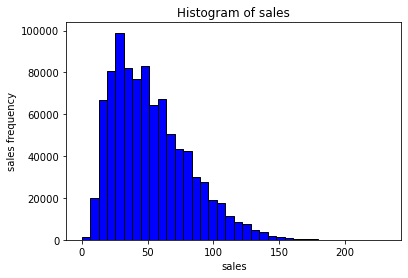

In [11]:
plt.hist(df['sales'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.title('Histogram of sales')
plt.xlabel('sales')
plt.ylabel('sales frequency')
#skewed to the right 

Feature Engineering

In [12]:
df["year"]=df.date.dt.year
df['month'] = df.date.dt.month
df['day_of_year'] = df.date.dt.dayofyear
df['week_of_year'] = df.date.dt.weekofyear 
df['day_of_week'] = df.date.dt.dayofweek
df["is_wknd"] = df.date.dt.weekday
df['is_month_start'] = df.date.dt.is_month_start.astype(int) 
df['is_month_end'] = df.date.dt.is_month_end.astype(int)
df['is_quarter_start'] = df['date'].dt.is_quarter_start
df['is_quarter_end'] = df['date'].dt.is_quarter_end
df['is_year_start'] = df['date'].dt.is_year_start
df['is_year_end'] = df['date'].dt.is_year_end
df.head()

<ipython-input-12-5b45b867df1f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.date.dt.weekofyear


,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,True,False,True,False
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,False,False,False,False
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,False,False,False,False
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,False,False,False,False
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,False,False,False,False


In [13]:
#daily , monthly, average
df['daily_avg']=df.groupby(['item','store','day_of_week'])['sales'].transform('mean')
df['monthly_avg']=df.groupby(['item','store','month'])['sales'].transform('mean')
df.head()

,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,True,False,True,False,18.168582,13.709677
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,False,False,False,False,18.793103,13.709677
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,False,False,False,False,19.452107,13.709677
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,False,False,False,False,21.015326,13.709677
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,False,False,False,False,22.973180,13.709677


Explian why store item need to be shifted 

In [14]:

df['store_item_shifted_365'] = df.groupby(["item","store"])['sales'].transform(lambda x:x.shift(1))
df.head(50)

,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,True,False,True,False,18.168582,13.709677,NaN
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,False,False,False,False,18.793103,13.709677,13.0
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,False,False,False,False,19.452107,13.709677,11.0
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,False,False,False,False,21.015326,13.709677,14.0
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,False,False,False,False,22.973180,13.709677,13.0
5,2013-01-06,1,1,12,2013,1,6,1,6,6,0,0,False,False,False,False,23.796935,13.709677,10.0
6,2013-01-07,1,1,10,2013,1,7,2,0,0,0,0,False,False,False,False,15.584615,13.709677,12.0
7,2013-01-08,1,1,9,2013,1,8,2,1,1,0,0,False,False,False,False,18.168582,13.709677,10.0
8,2013-01-09,1,1,12,2013,1,9,2,2,2,0,0,False,False,False,False,18.793103,13.709677,9.0
9,2013-01-10,1,1,9,2013,1,10,2,3,3,0,0,False,False,False,False,19.452107,13.709677,12.0


In [15]:
# shifted total sales for 12 week or 90 days
df["item-week_shifted_90"] = df.groupby(['week_of_year',"item"])["sales"].transform(lambda x:x.shift(12).sum())
df.head(5)

,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365,item-week_shifted_90
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,True,False,True,False,18.168582,13.709677,NaN,4882
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,False,False,False,False,18.793103,13.709677,13.0,4882
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,False,False,False,False,19.452107,13.709677,11.0,4882
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,False,False,False,False,21.015326,13.709677,14.0,4882
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,False,False,False,False,22.973180,13.709677,13.0,4882


In [16]:
#Create mask for boolean values for  dataset
df['is_month_start'] = df['is_month_start'].replace({True: 1, False: 0})
df['is_month_end'] = df['is_month_end'].replace({True: 1, False: 0})
df['is_quarter_start'] = df['is_quarter_start'].replace({True: 1, False: 0})
df['is_quarter_end'] = df['is_quarter_end'].replace({True: 1, False: 0})
df['is_year_start'] = df['is_year_start'].replace({True: 1, False: 0})
df['is_year_end'] = df['is_year_end'].replace({True: 1, False: 0})

#convert float to int
df['daily_avg']=df['daily_avg'].astype(np.int64)
df['monthly_avg']=df['monthly_avg'].astype(np.int64)
df.dtypes

date                      datetime64[ns]
store                              int64
item                               int64
sales                              int64
year                               int64
month                              int64
day_of_year                        int64
week_of_year                       int64
day_of_week                        int64
is_wknd                            int64
is_month_start                     int32
is_month_end                       int32
is_quarter_start                   int64
is_quarter_end                     int64
is_year_start                      int64
is_year_end                        int64
daily_avg                          int64
monthly_avg                        int64
store_item_shifted_365           float64
item-week_shifted_90               int64
dtype: object

In [17]:
df['store_item_shifted_365'].fillna(df['store_item_shifted_365'].mode()[0], inplace=True)
df['store_item_shifted_365']=df['store_item_shifted_365'].astype(np.int64)
df.dtypes

date                      datetime64[ns]
store                              int64
item                               int64
sales                              int64
year                               int64
month                              int64
day_of_year                        int64
week_of_year                       int64
day_of_week                        int64
is_wknd                            int64
is_month_start                     int32
is_month_end                       int32
is_quarter_start                   int64
is_quarter_end                     int64
is_year_start                      int64
is_year_end                        int64
daily_avg                          int64
monthly_avg                        int64
store_item_shifted_365             int64
item-week_shifted_90               int64
dtype: object

Explain why rolling mean and DF test 

In [20]:
#rolling mean
roll_mean = df.rolling(window=12, center=False).mean()
roll_std = df.rolling(window=12, center=False).std()
print(roll_mean)
print(roll_std)

        store  item      sales    year  month  day_of_year  week_of_year  \
0         NaN   NaN        NaN     NaN    NaN          NaN           NaN   
1         NaN   NaN        NaN     NaN    NaN          NaN           NaN   
2         NaN   NaN        NaN     NaN    NaN          NaN           NaN   
3         NaN   NaN        NaN     NaN    NaN          NaN           NaN   
4         NaN   NaN        NaN     NaN    NaN          NaN           NaN   
...       ...   ...        ...     ...    ...          ...           ...   
912995   10.0  50.0  61.250000  2017.0   12.0        355.5     51.083333   
912996   10.0  50.0  61.833333  2017.0   12.0        356.5     51.250000   
912997   10.0  50.0  60.833333  2017.0   12.0        357.5     51.416667   
912998   10.0  50.0  61.583333  2017.0   12.0        358.5     51.500000   
912999   10.0  50.0  63.916667  2017.0   12.0        359.5     51.583333   

        day_of_week   is_wknd  is_month_start  is_month_end  is_quarter_start  \
0     

<function matplotlib.pyplot.show(close=None, block=None)>

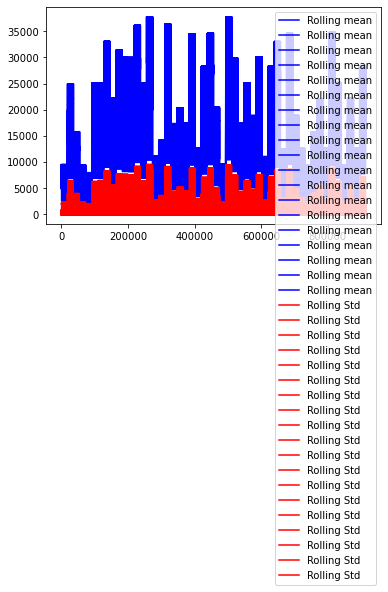

In [29]:
mean= plt.plot(roll_mean,color='blue',label='Rolling mean') 
std=plt.plot(roll_std,color='red',label='Rolling Std')
plt.legend(loc='best')
plt.show

In [49]:
import statsmodels.tsa.stattools as tsa
df1=df.drop(['date', 'is_quarter_start','is_quarter_end', 'is_year_start','is_year_end'], axis=1)
df1.dtypes

store                     int64
item                      int64
sales                     int64
year                      int64
month                     int64
day_of_year               int64
week_of_year              int64
day_of_week               int64
is_wknd                   int64
is_month_start            int32
is_month_end              int32
daily_avg                 int64
monthly_avg               int64
store_item_shifted_365    int64
item-week_shifted_90      int64
dtype: object

In [22]:
#Isolating only item 1 to work on prediction 
filt1=(df['item']==1)
df1=df[filt1]
df1.head()

,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365,item-week_shifted_90
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,1,0,1,0,18,13,30,4882
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,0,0,0,0,18,13,13,4882
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,0,0,0,0,19,13,11,4882
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,0,0,0,0,21,13,14,4882
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,0,0,0,0,22,13,13,4882


In [23]:
df1.set_index('date', inplace=True)
df1.head()

,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365,item-week_shifted_90
date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,1,0,1,0,18,13,30,4882
2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,0,0,0,0,18,13,13,4882
2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,0,0,0,0,19,13,11,4882
2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,0,0,0,0,21,13,14,4882
2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,0,0,0,0,22,13,13,4882


<AxesSubplot:xlabel='date'>

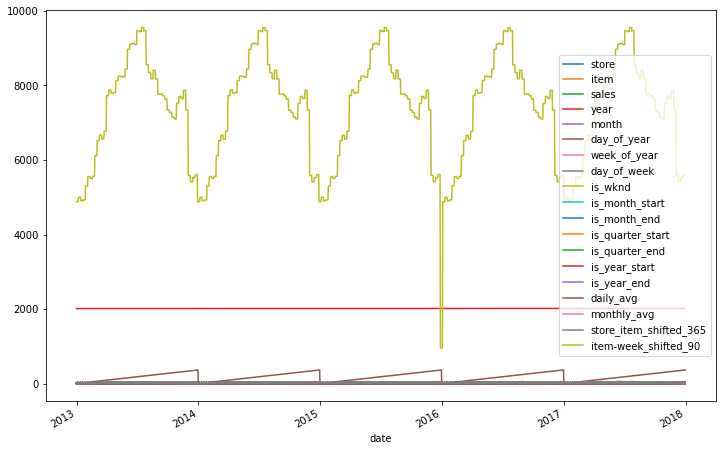

In [24]:
df1.plot(kind='line', figsize=(12,8), label='Item1')

In [ ]:
#DF test

In [25]:
from statsmodels.tsa.stattools import adfuller
#df test and p value
X=df1['sales'].values
result=adfuller(X)
print(result[1])

3.0654594315119055e-10


In [26]:
result1=adfuller(np.log(X))
print(result1[1])

5.347581355084382e-11


In [27]:
result2=adfuller(np.sqrt(X))
print(result2[1])

1.6402225006228601e-10


In [28]:
result3=adfuller(np.cbrt(X))
print(result3[1])

1.2021880901419768e-10


In [46]:
daily_avg=df.groupby(['item','store','day_of_week'])['sales'].mean()
monthly_avg=df.groupby(['item','store','month'])['sales'].mean()
item_month_sum=df.groupby(['month','item'])['sales'].sum()
df.head()

,date,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365,item-week_shifted_90
0,2013-01-01,1,1,13,2013,1,1,1,1,1,1,0,1,0,1,0,18,13,30,4882
1,2013-01-02,1,1,11,2013,1,2,1,2,2,0,0,0,0,0,0,18,13,13,4882
2,2013-01-03,1,1,14,2013,1,3,1,3,3,0,0,0,0,0,0,19,13,11,4882
3,2013-01-04,1,1,13,2013,1,4,1,4,4,0,0,0,0,0,0,21,13,14,4882
4,2013-01-05,1,1,10,2013,1,5,1,5,5,0,0,0,0,0,0,22,13,13,4882


In [30]:
correlation_matrix = df.corr().round(2)

<AxesSubplot:>

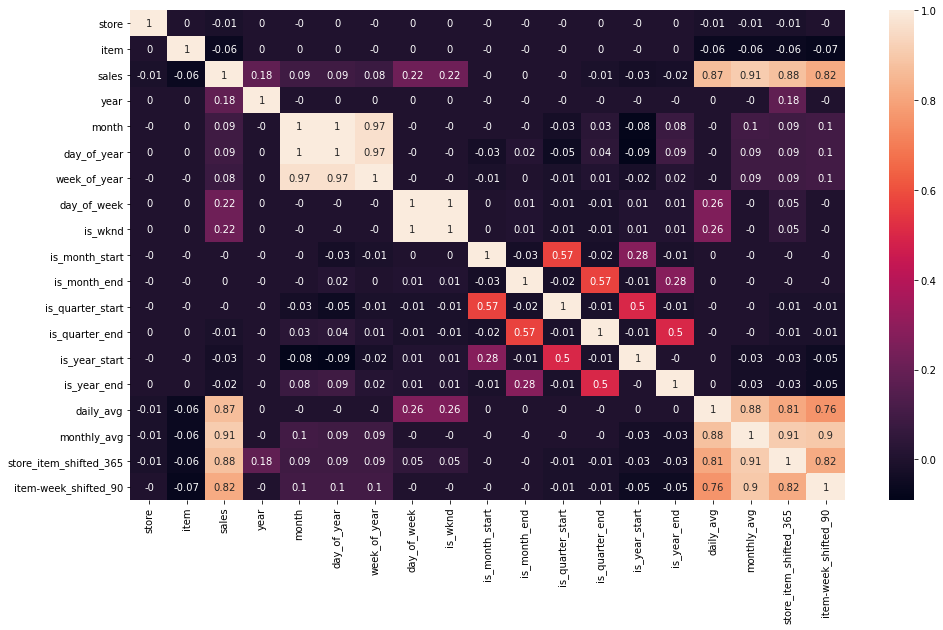

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
df=df.drop('date', axis=1)
df.head()

,store,item,sales,year,month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,daily_avg,monthly_avg,store_item_shifted_365,item-week_shifted_90
0,1,1,13,2013,1,1,1,1,1,1,0,1,0,1,0,18,13,30,4882
1,1,1,11,2013,1,2,1,2,2,0,0,0,0,0,0,18,13,13,4882
2,1,1,14,2013,1,3,1,3,3,0,0,0,0,0,0,19,13,11,4882
3,1,1,13,2013,1,4,1,4,4,0,0,0,0,0,0,21,13,14,4882
4,1,1,10,2013,1,5,1,5,5,0,0,0,0,0,0,22,13,13,4882


In [36]:
y = df['sales'].values
X = df.drop(['sales'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(730400, 18) (730400,) (182600, 18) (182600,)


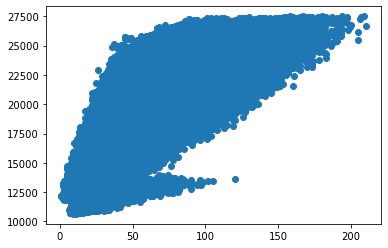

In [42]:
plt.scatter(y_test, y_pred)
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
   
y_pred1 = y_pred
y_pred1 = y_pred1.reshape(-1,1)
   
print("\n   RESULT OF LINEAR REGRESSION PREDICTION : ")
print ("\nFirst 10 Predicted value : \n", y_pred1[0:10, :])


   RESULT OF LINEAR REGRESSION PREDICTION : 

First 10 Predicted value : 
 [[14685.35804958]
 [19320.43203445]
 [20255.7737695 ]
 [14456.15793926]
 [20192.27614507]
 [16756.28130457]
 [17915.43277318]
 [19483.79563854]
 [14706.67241342]
 [15468.82426532]]
